In [15]:
import numpy
import matplotlib.pyplot as plt

N = 1000
r = 1.0

inside = []
for i in range(N):
    x = numpy.random.uniform(-1, 1)
    y = numpy.random.uniform(-1, 1)
    dist = (x**2. + y**2.)**0.5
    pos = (x,y)
    if dist < r:
        inside.append(pos)

print (len(inside))
fraction = len(inside) /N        
print ("The ratio of N_sinde to N_total = ", fraction)        
Area_MC = 4. * fraction
print ("Area_MC=", Area_MC)
    


793
The ratio of N_sinde to N_total =  0.793
Area_MC= 3.172


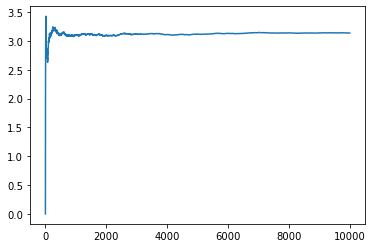

In [4]:
import numpy
import matplotlib.pyplot as plt

N = 10000
r = 1.0
count_inside = 0
A_MC_list = []
Iter_list = []
for i in range(N):
    x = numpy.random.uniform(-1, 1)
    y = numpy.random.uniform(-1, 1)
    dist = (x**2. + y**2.)**0.5
    if dist < r:
        count_inside = 1+count_inside
    fraction = count_inside / (i+1) 
    A_MC = 4. * fraction
    A_MC_list.append(A_MC)
    Iter_list.append(i+1)
    
plt.plot(Iter_list, A_MC_list,'-')



